In [1]:
import main
import numpy as np
import pandas as pd

In [2]:
paths = ['Data/ydata']
main.read_news_data(paths)

4460598 events read with 55 articles
Skipped broken events: 221394


In [3]:
from mab import Egreedy, ThompsonSampling, Ucb1, LinUcb
from matplotlib import pyplot as plt

In [4]:
_ , res = main.run(Egreedy(0.1, main.arms_number))
rounds = res[-1]

Egreedy e=0.1
Execution time:  39.2s
CTR achieved:  0.0595


Egreedy e=0.01
Execution time:  39.3s
CTR achieved:  0.0572
Egreedy e=0.01
Execution time:  22.4s
CTR achieved:  0.0625
Egreedy e=0.01
Execution time:  13.6s
CTR achieved:  0.0675
Egreedy e=0.01
Execution time:  9.1s
CTR achieved:  0.0648
Egreedy e=0.01
Execution time:  4.6s
CTR achieved:  0.068
Egreedy e=0.01
Execution time:  2.2s
CTR achieved:  0.051
Egreedy e=0.01
Execution time:  0.4s
CTR achieved:  0.0711


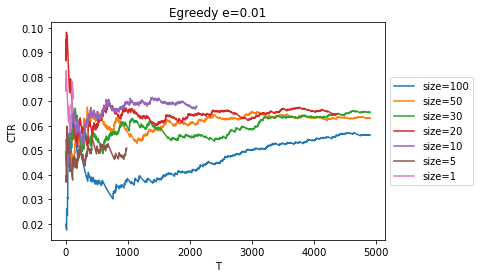

ThompsonSampling
Execution time:  2.7m
CTR achieved:  0.0591
ThompsonSampling
Execution time:  1.3m
CTR achieved:  0.0629
ThompsonSampling
Execution time:  47.5s
CTR achieved:  0.0698
ThompsonSampling
Execution time:  31.4s
CTR achieved:  0.072
ThompsonSampling
Execution time:  15.7s
CTR achieved:  0.0568
ThompsonSampling
Execution time:  7.8s
CTR achieved:  0.0537
ThompsonSampling
Execution time:  1.6s
CTR achieved:  0.0978


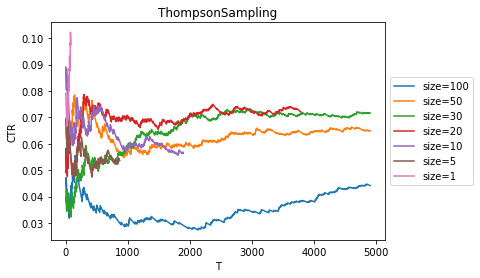

UCB1 α=0.01
Execution time:  1.4m
CTR achieved:  0.0558
UCB1 α=0.01
Execution time:  43.9s
CTR achieved:  0.0575
UCB1 α=0.01
Execution time:  27.0s
CTR achieved:  0.0601
UCB1 α=0.01
Execution time:  17.8s
CTR achieved:  0.06
UCB1 α=0.01
Execution time:  9.0s
CTR achieved:  0.0585
UCB1 α=0.01
Execution time:  4.4s
CTR achieved:  0.0566
UCB1 α=0.01
Execution time:  0.9s
CTR achieved:  0.0369


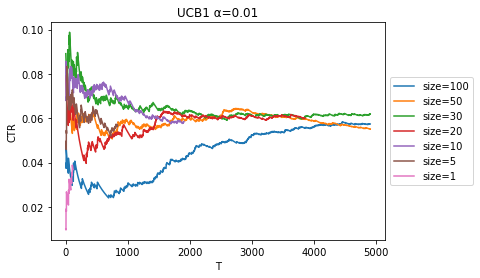

LinUcb alpha=0.3
Execution time:  108.2m
CTR achieved:  0.065
LinUcb alpha=0.3
Execution time:  62.0m
CTR achieved:  0.0722
LinUcb alpha=0.3
Execution time:  37.3m
CTR achieved:  0.0646
LinUcb alpha=0.3
Execution time:  25.1m
CTR achieved:  0.0711
LinUcb alpha=0.3
Execution time:  13.5m
CTR achieved:  0.0594
LinUcb alpha=0.3
Execution time:  5.9m
CTR achieved:  0.0749
LinUcb alpha=0.3
Execution time:  1.1m
CTR achieved:  0.0785


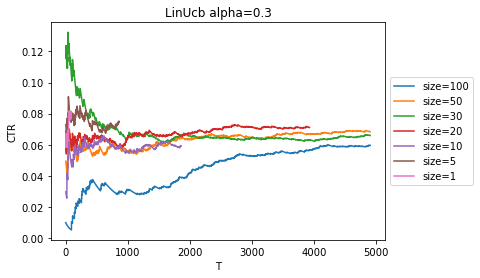

In [5]:
sizes = [100,50,30,20,10,5,1]
results = [['Ratio','Type','Algorithm','CTR Lift']]
bandits = [Egreedy(0.01, main.arms_number), ThompsonSampling(main.arms_number), Ucb1(0.01, main.arms_number), LinUcb(0.3, main.arms_number)]

for b in bandits:
    for size in sizes:
        train ,test = main.run(b,size=size)
        results.append([size,'train',b.name, train[-1]/rounds])
        results.append([size,'test',b.name, test[-1]/rounds])
        
        plt.plot(test[100:5000], label="size={}".format(size))
        
    plt.title(b.name)
    plt.xlabel("T")
    plt.ylabel("CTR")
    plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
    plt.show()

In [6]:
df = pd.DataFrame(results)
df.columns = df.iloc[0]
df = df[1:]
df

,Ratio,Type,Algorithm,CTR Lift
1,100,train,Egreedy e=0.01,0.972071
2,100,test,Egreedy e=0.01,0.960199
3,50,train,Egreedy e=0.01,1.04917
4,50,test,Egreedy e=0.01,1.05022
5,30,train,Egreedy e=0.01,1.06485
6,30,test,Egreedy e=0.01,1.13293
7,20,train,Egreedy e=0.01,1.06303
8,20,test,Egreedy e=0.01,1.08873
9,10,train,Egreedy e=0.01,1.09462
10,10,test,Egreedy e=0.01,1.14144
